In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../assets/datasets/sleeping-alone-data.csv')

In [5]:
df.rename(columns={'When both you and your partner are at home, how often do you sleep in separate beds?':'SleepAlone'}, 
          inplace=True)

In [6]:
df.responses = df.iloc[0]
df = df.iloc[1:]
df.head()

,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.",SleepAlone,"When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,...,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement:�_""our sex life has improved as a result of sleeping in separate beds.""�_",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
1,7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,...,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
2,7/10/14 15:54,7/10/14 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,...,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
3,7/10/14 15:44,7/10/14 15:49,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic
4,7/10/14 13:47,7/10/14 13:47,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Life, Physical, and Social Science Occupations",NaN,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
5,7/10/14 13:13,7/10/14 13:14,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Office and Administrative Support Occupations,NaN,Male,18-29,"$100,000 - $149,999",Graduate degree,South Atlantic


In [11]:
groups = df.groupby(by="SleepAlone")

In [15]:
for name, group in groups:
    print "[{}]\t{}".format(name, type(group))

[A few times per month]	<class 'pandas.core.frame.DataFrame'>
[A few times per week]	<class 'pandas.core.frame.DataFrame'>
[Every night]	<class 'pandas.core.frame.DataFrame'>
[Never]	<class 'pandas.core.frame.DataFrame'>
[Once a month or less]	<class 'pandas.core.frame.DataFrame'>
[Once a year or less]	<class 'pandas.core.frame.DataFrame'>


In [17]:
groups.Age.value_counts()

SleepAlone             Age  
A few times per month  30-44     23
                       45-60     19
                       > 60      12
                       18-29      4
A few times per week   30-44     21
                       45-60     12
                       > 60       9
                       18-29      2
Every night            > 60      61
                       45-60     44
                       30-44     26
                       18-29      6
Never                  45-60    165
                       > 60     155
                       30-44    142
                       18-29     77
Once a month or less   30-44     36
                       45-60     29
                       18-29     18
                       > 60      13
Once a year or less    45-60     43
                       30-44     40
                       > 60      33
                       18-29     15
Name: Age, dtype: int64

In [38]:
unstacked_groups = groups.Age.value_counts().unstack()
unstacked_groups

Age,18-29,30-44,45-60,> 60
SleepAlone,,,,
A few times per month,4,23,19,12
A few times per week,2,21,12,9
Every night,6,26,44,61
Never,77,142,165,155
Once a month or less,18,36,29,13
Once a year or less,15,40,43,33


In [39]:
stacked_again = unstacked_groups.stack()
stacked_again

SleepAlone             Age  
A few times per month  18-29      4
                       30-44     23
                       45-60     19
                       > 60      12
A few times per week   18-29      2
                       30-44     21
                       45-60     12
                       > 60       9
Every night            18-29      6
                       30-44     26
                       45-60     44
                       > 60      61
Never                  18-29     77
                       30-44    142
                       45-60    165
                       > 60     155
Once a month or less   18-29     18
                       30-44     36
                       45-60     29
                       > 60      13
Once a year or less    18-29     15
                       30-44     40
                       45-60     43
                       > 60      33
dtype: int64

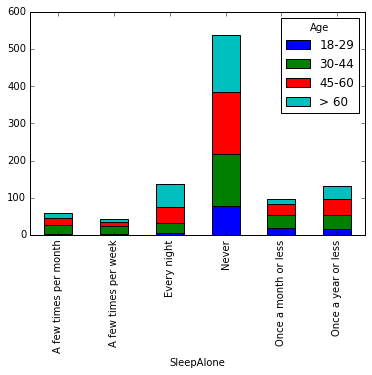

In [21]:
groups.Age.value_counts().unstack().plot.bar(stacked=True)

In [22]:
percAge = groups.Age.value_counts()/groups.Age.count()
percAge.unstack()

Age,18-29,30-44,45-60,> 60
SleepAlone,,,,
A few times per month,0.068966,0.396552,0.327586,0.206897
A few times per week,0.045455,0.477273,0.272727,0.204545
Every night,0.043796,0.189781,0.321168,0.445255
Never,0.142857,0.263451,0.306122,0.287570
Once a month or less,0.187500,0.375000,0.302083,0.135417
Once a year or less,0.114504,0.305344,0.328244,0.251908


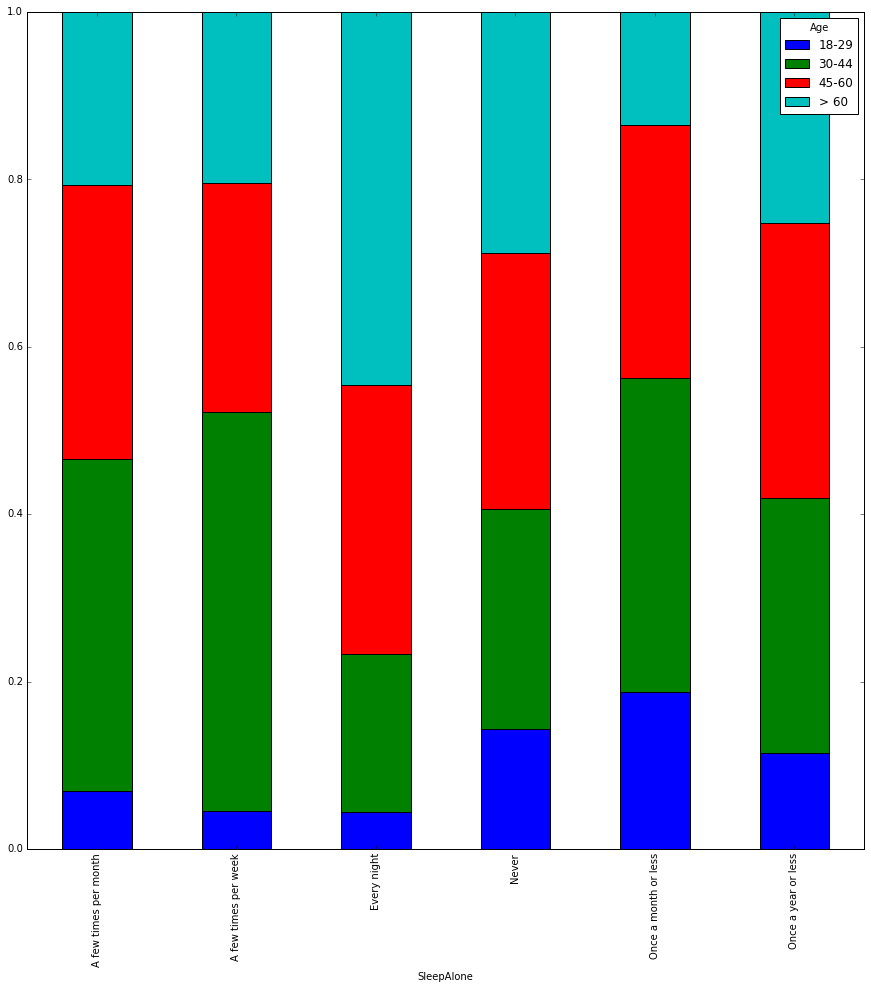

In [27]:
percAge.unstack().plot(kind='bar', stacked=True, figsize=(15,15))